In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import sys

def calculate_mse(y_true, y_pred):
    y_true = y_true.reshape(y_true.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    return np.mean((np.array(y_true) - np.array(y_pred)) ** 2, axis = -1)

def calculate_l2_error(y_true, y_pred):
    y_true = y_true.reshape(y_true.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    relative_errors = np.linalg.norm(y_true - y_pred, axis=0) / (np.linalg.norm(y_true, axis=0) + np.finfo(float).eps)
    return np.mean(relative_errors)

errors = np.zeros((4, 4))

fno = loadmat('fno/Results/Earthquake_responses_test.mat') # Load the .mat file
ground_motion = fno['x_test'][:,:,-1]
target_fno = fno['y_test'][:,:,-1]
prediction_fno = fno['y_pred'][:,:,-1]
mse_fno_samp = calculate_mse(target_fno,prediction_fno)
mse_fno = np.mean(mse_fno_samp)
l2_fno = calculate_l2_error(target_fno,prediction_fno)

errors[0,0] = mse_fno
errors[0,1] = np.min(mse_fno_samp)
min_index = np.argmin(mse_fno_samp)
print("Index of minimum FNO:", min_index)
errors[0,2] = np.max(mse_fno_samp)
errors[0,3] = l2_fno

sa_fno = loadmat('sa-fno/Results/Earthquake_responses_test.mat') # Load the .mat file
prediction_sa_fno = sa_fno['y_pred'][:,:,-1]
mse_sa_fno_samp = calculate_mse(target_fno,prediction_sa_fno)
mse_sa_fno = np.mean(mse_sa_fno_samp)
l2_sa_fno = calculate_l2_error(target_fno,prediction_sa_fno)

errors[1,0] = mse_sa_fno
errors[1,1] = np.min(mse_sa_fno_samp)
min_index = np.argmin(mse_sa_fno_samp)
print("Index of minimum SA-FNO:", min_index)
errors[1,2] = np.max(mse_sa_fno_samp)
errors[1,3] = l2_sa_fno

deeponet_fno = loadmat('deeponet+fno/Results/Earthquake_responses_test_fno.mat') # Load the .mat file
prediction_deeponet_fno = deeponet_fno['y_pred']
mse_deeponet_fno_samp = calculate_mse(target_fno,prediction_deeponet_fno)
mse_deeponet_fno = np.mean(mse_deeponet_fno_samp)
l2_deeponet_fno = calculate_l2_error(target_fno,prediction_deeponet_fno)

errors[2,0] = mse_deeponet_fno
errors[2,1] = np.min(mse_deeponet_fno_samp)
min_index = np.argmin(mse_deeponet_fno_samp)
print("Index of minimum DeepONet+FNO:", min_index)
errors[2,2] = np.max(mse_deeponet_fno_samp)
errors[2,3] = l2_deeponet_fno

deeponet = loadmat('deeponet+fno/Results/pred_deeponet_test.mat') # Load the .mat file
prediction_deeponet = deeponet['disp_pred']
mse_deeponet_samp = calculate_mse(target_fno,prediction_deeponet)
mse_deeponet = np.mean(mse_deeponet_samp)
l2_deeponet = calculate_l2_error(target_fno,prediction_deeponet)

errors[3,0] = mse_deeponet
errors[3,1] = np.min(mse_deeponet_samp)
min_index = np.argmin(mse_deeponet_samp)
print("Index of minimum DeepONet:", min_index)
errors[3,2] = np.max(mse_deeponet_samp)
errors[3,3] = l2_deeponet

print(errors)

Index of minimum FNO: 25
Index of minimum SA-FNO: 120
Index of minimum DeepONet+FNO: 198
Index of minimum DeepONet: 179
[[7.14624375e-02 2.87577324e-02 2.04217196e-01 2.60548485e-01]
 [7.81621262e-02 2.83369087e-02 2.20307663e-01 2.54201157e-01]
 [1.84583318e+00 4.78298515e-01 7.26098824e+00 8.06405343e-01]
 [3.29740143e+01 8.80294037e+00 1.11204430e+02 1.90416483e+00]]


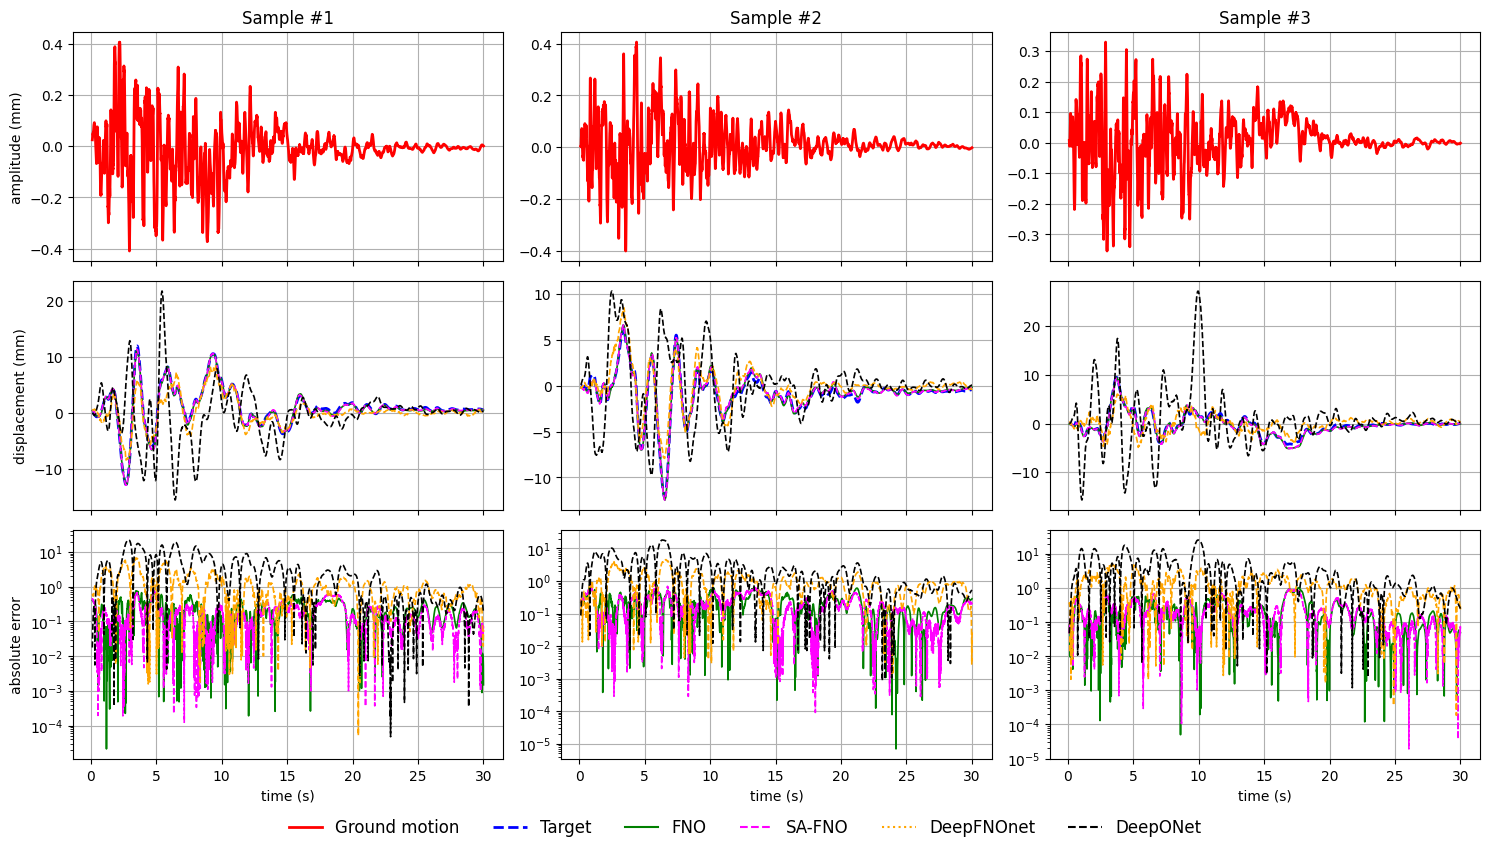

In [15]:
# This script is for plotting three samples 
import numpy as np
import matplotlib.pyplot as plt

samp_number = 15
time_step = 1
input_signal1 = ground_motion[samp_number,::time_step]
ux = target_fno[samp_number,::time_step]
ux_a = prediction_fno[samp_number,::time_step]
ux_b = prediction_sa_fno[samp_number,::time_step]
ux_c = prediction_deeponet_fno[samp_number,::time_step,0]
ux_d = prediction_deeponet[samp_number,::time_step] 

samp_number = 90
input_signal2 = ground_motion[samp_number,::time_step]
uy = target_fno[samp_number,::time_step]
uy_a = prediction_fno[samp_number,::time_step]
uy_b = prediction_sa_fno[samp_number,::time_step]
uy_c = prediction_deeponet_fno[samp_number,::time_step,0]
uy_d = prediction_deeponet[samp_number,::time_step] 

samp_number = 10
input_signal3 = ground_motion[samp_number,::time_step]
uz = target_fno[samp_number,::time_step]
uz_a = prediction_fno[samp_number,::time_step]
uz_b = prediction_sa_fno[samp_number,::time_step]
uz_c = prediction_deeponet_fno[samp_number,::time_step,0]
uz_d = prediction_deeponet[samp_number,::time_step] 

t = loadmat('data/dataset_EQ.mat')['time'][0,21::] # Load the .mat file

# Calculate errors
error_ux_a = ux - ux_a
error_ux_b = ux - ux_b
error_ux_c = ux - ux_c
error_ux_d = ux - ux_d

error_uy_a = uy - uy_a
error_uy_b = uy - uy_b
error_uy_c = uy - uy_c
error_uy_d = uy - uy_d

error_uz_a = uz - uz_a
error_uz_b = uz - uz_b
error_uz_c = uz - uz_c
error_uz_d = uz - uz_d

# Create figure and subplots with extra space at bottom for legend
fig, axes = plt.subplots(3, 3, figsize=(15, 8.5))

axes[0,0].plot(t, input_signal1, color='red', linestyle='solid', linewidth=2)
axes[0,0].set_title('Sample #1')
axes[0,0].set_xticklabels([])
axes[0,0].set_ylabel('amplitude (mm)')
axes[0,0].grid(True)

axes[0,1].plot(t, input_signal2, color='red', linestyle='solid', linewidth=2)
axes[0,1].set_title('Sample #2')
axes[0,1].set_xticklabels([])
axes[0,1].grid(True)

axes[0,2].plot(t, input_signal3, color='red', linestyle='solid', linewidth=2)
axes[0,2].set_title('Sample #3')
axes[0,2].set_xticklabels([])
axes[0,2].grid(True)

# First row: Displacements
# UX plot
axes[1,0].plot(t, ux, color='blue', linestyle='--', linewidth=2)
axes[1,0].plot(t, ux_a, color='green', linestyle='-', linewidth=1.2)
axes[1,0].plot(t, ux_b, color='magenta', linestyle='--', linewidth=1.2)
axes[1,0].plot(t, ux_c, color='orange', linestyle='dashed', linewidth=1.2)
axes[1,0].plot(t, ux_d, color='black', linestyle='dashed', linewidth=1.2)
#axes[1,0].set_title('Sample #1')
axes[1,0].set_xticklabels([])
#axes[0,0].set_xlabel('time (s)')
axes[1,0].set_ylabel('displacement (mm)')
axes[1,0].grid(True)

# UY plot
axes[1,1].plot(t, uy, color='blue', linestyle='--', linewidth=2)
axes[1,1].plot(t, uy_a, color='green', linestyle='-', linewidth=1.2)
axes[1,1].plot(t, uy_b, color='magenta', linestyle='--', linewidth=1.2)
axes[1,1].plot(t, uy_c, color='orange', linestyle='dashed', linewidth=1.2)
axes[1,1].plot(t, uy_d, color='black', linestyle='dashed', linewidth=1.2)
#axes[1,1].set_title('Sample #2')
axes[1,1].set_xticklabels([])
#axes[0,1].set_xlabel('time (s)')
#axes[0,1].set_ylabel('displacement (mm)')
axes[1,1].grid(True)

# UZ plot
axes[1,2].plot(t, uz, color='blue', linestyle='--', linewidth=2)
axes[1,2].plot(t, uz_a, color='green', linestyle='-', linewidth=1.2)
axes[1,2].plot(t, uz_b, color='magenta', linestyle='--', linewidth=1.2)
axes[1,2].plot(t, uz_c, color='orange', linestyle='dashed', linewidth=1.2)
axes[1,2].plot(t, uz_d, color='black', linestyle='dashed', linewidth=1.2)
#axes[1,2].set_title('Sample #3')
axes[1,2].set_xticklabels([])
#axes[0,2].set_xlabel('time (s)')
#axes[0,2].set_ylabel('displacement (mm)')
axes[1,2].grid(True)

# Second row: Errors
# UX error
axes[2,0].plot(t, np.abs(error_ux_a), color='green', linestyle='-', linewidth=1.2)
axes[2,0].plot(t, np.abs(error_ux_b), color='magenta', linestyle='--', linewidth=1.2)
axes[2,0].plot(t, np.abs(error_ux_c), color='orange', linestyle='dashed', linewidth=1.2)
axes[2,0].plot(t, np.abs(error_ux_d), color='black', linestyle='dashed', linewidth=1.2)
axes[2,0].set_xlabel('time (s)')
axes[2,0].set_ylabel('absolute error')
axes[2,0].set_yscale('log')
axes[2,0].grid(True)

# UY error
axes[2,1].plot(t, np.abs(error_uy_a), color='green', linestyle='-', linewidth=1.2)
axes[2,1].plot(t, np.abs(error_uy_b), color='magenta', linestyle='--', linewidth=1.2)
axes[2,1].plot(t, np.abs(error_uy_c), color='orange', linestyle='dashed', linewidth=1.2)
axes[2,1].plot(t, np.abs(error_uy_d), color='black', linestyle='dashed', linewidth=1.2)
axes[2,1].set_xlabel('time (s)')
#axes[1,1].set_ylabel('absolute error')
axes[2,1].set_yscale('log')
axes[2,1].grid(True)

# UZ error
axes[2,2].plot(t, np.abs(error_uz_a), color='green', linestyle='-', linewidth=1.2)
axes[2,2].plot(t, np.abs(error_uz_b), color='magenta', linestyle='--', linewidth=1.2)
axes[2,2].plot(t, np.abs(error_uz_c), color='orange', linestyle='dashed', linewidth=1.2)
axes[2,2].plot(t, np.abs(error_uz_d), color='black', linestyle='dashed', linewidth=1.2)
axes[2,2].set_xlabel('time (s)')
#axes[1,2].set_ylabel('absolute error')
axes[2,2].set_yscale('log')
axes[2,2].grid(True)

# Adjust the layout
plt.tight_layout()

# Create lines for legend
legend_lines = [
    plt.Line2D([0], [0], color='red', linestyle='solid', linewidth=2, label='Ground motion'),
    plt.Line2D([0], [0], color='blue', linestyle='--', linewidth=2, label='Target'),
    plt.Line2D([0], [0], color='green', linestyle='-', label='FNO'),
    plt.Line2D([0], [0], color='magenta', linestyle='--', label='SA-FNO'),
    plt.Line2D([0], [0], color='orange', linestyle='dotted', label='DeepFNOnet'),
    plt.Line2D([0], [0], color='black', linestyle='dashed', label='DeepONet')
    ]

# Add legend below the plots
fig.legend(handles=legend_lines, loc='center', bbox_to_anchor=(0.5, 0.02), 
          ncol=6, frameon=False, fontsize=12)

# Adjust subplot spacing to make room for legend
plt.subplots_adjust(bottom=0.1)

plt.savefig('eq_response_fno_sa-fno_deeponetfno_deeponet.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()